# Informe reto simulador de tráfico

## Presentado por:
#### Johan Felipe Marín Gonzalez
#### Andrés Felipe Bravo Giraldo

## Espesifícaciones del equipo en el que se corre la implementación
*-memory
          description: System memory
          physical id: 0
          size: 31GiB
          
          
*-cpu
          product: Intel(R) Core(TM) i7-6700K CPU @ 4.00GHz
          vendor: Intel Corp.
          physical id: 1
          bus info: cpu@0
          size: 3861MHz
          capacity: 4200MHz
          width: 64 bits
            

tarjeta gráfica GM204 [GeForce GTX 980]
cores 2048
bloques 16

Análisis implementado bajo Jupyter utilizando la librería pandas

In [82]:
%pylab inline
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Se cargan los datos csv generados por el código binario ejecutado en la máquina referente a las ejecuciones de manera secuencial

In [83]:
df_ts100 = pd.read_csv("ts100.csv",sep=",")
df_ts1000 = pd.read_csv("ts1000.csv",sep=",")
df_ts10000 = pd.read_csv("ts10000.csv",sep=",")
df_ts50000 = pd.read_csv("ts50000.csv",sep=",")

Datos generados por la ejecución secuencial para el tamaño de carretera de 100 e iteraciones entre 1000 y 70000

In [84]:
df_ts100

,1000,5000,10000,15000,20000,30000,40000,50000,60000,70000
0,590939.0,3016290.0,6088020.0,9197540.0,13388200.0,18856600.0,59090700.0,115425000.0,117854000.0,130915000.0
1,596069.0,3053230.0,6152830.0,9254790.0,12500400.0,38584700.0,248960000.0,169939000.0,135721000.0,192493000.0
2,2096750.0,7968820.0,10433100.0,11377500.0,12593100.0,60034200.0,98484200.0,46416200.0,38155600.0,44412800.0
3,601069.0,3050720.0,6172780.0,9338980.0,12617000.0,18980100.0,25657800.0,31801800.0,38164600.0,44488000.0
4,604079.0,3068700.0,6175640.0,9336510.0,12619400.0,18929700.0,25658100.0,31733300.0,38235900.0,44762700.0
5,595448.0,3059400.0,6164980.0,9337060.0,12591400.0,19000400.0,25623800.0,31824200.0,37971700.0,44257900.0
6,596896.0,3042420.0,6129430.0,9242580.0,12486600.0,18801300.0,25238700.0,31441700.0,37776900.0,43983800.0
7,589606.0,2998550.0,6112520.0,9229080.0,12448400.0,18656600.0,25142500.0,31345200.0,37869200.0,44095300.0
8,592129.0,3015620.0,6108980.0,9232500.0,12394500.0,18638100.0,25237500.0,31282900.0,37650500.0,44333500.0
9,599002.0,3055480.0,6145530.0,9246830.0,12491200.0,18710000.0,25267700.0,31314700.0,37732200.0,44025500.0


In [85]:
columnas100 = df_ts100.columns
catidadElementos100 = len(df_ts100)

Se procede a alistar los tiempos promediados en funcion de el tamaño de la carretera

In [86]:
d = {'Tiempo Secuencial': [], 'Tamaño Carretera': []}
for i in columnas100:
    d["Tiempo Secuencial"].append(df_ts100[i].mean())
    d["Tamaño Carretera"].append(i)
df100 = pd.DataFrame(data=d)

tabla de tiempos promedio para una carretera de tamaño 100

In [87]:
df100

,Tiempo Secuencial,Tamaño Carretera
0,746198.7,1000
1,3532923.0,5000
2,6568381.0,10000
3,9479337.0,15000
4,12613020.0,20000
5,24919170.0,30000
6,58436100.0,40000
7,55252400.0,50000
8,55713160.0,60000
9,67776750.0,70000


## Gŕafica correspondiente a un tamaño de carretera de 100

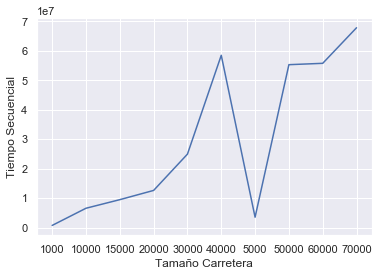

In [88]:

sns.set(style="darkgrid")
sns.lineplot(x="Tamaño Carretera", y="Tiempo Secuencial",
             #style="event",
             data=df100)

Tiempos para carretera de tamaño 1000 con interaciones entre 1000 y 70000

In [89]:
df_ts1000

,1000,5000,10000,15000,20000,30000,40000,50000,60000,70000
0,7486460.0,28322000.0,55616100.0,83552500.0,111446000.0,166634000.0,226146000.0,281331000.0,338631000.0,395557000.0
1,5444400.0,27947000.0,55808500.0,83437300.0,111659000.0,166328000.0,226227000.0,281797000.0,337520000.0,394821000.0
2,5412780.0,28059100.0,55774100.0,83540600.0,111733000.0,167553000.0,226403000.0,282533000.0,338956000.0,395301000.0
3,5447060.0,27778000.0,55852500.0,83824500.0,111714000.0,166978000.0,226078000.0,282113000.0,336563000.0,394855000.0
4,5446380.0,27943300.0,55725300.0,83756800.0,111757000.0,167146000.0,226436000.0,281664000.0,337734000.0,394325000.0
5,5440790.0,27950200.0,55778300.0,83854700.0,111846000.0,167047000.0,227164000.0,283108000.0,338138000.0,393172000.0
6,5431500.0,27927400.0,55778900.0,83944300.0,111756000.0,167212000.0,226841000.0,282695000.0,337955000.0,395090000.0
7,5455680.0,27936900.0,55721100.0,83894700.0,111534000.0,167245000.0,226919000.0,281136000.0,337816000.0,393990000.0
8,5434450.0,27968800.0,55678100.0,83354700.0,112549000.0,166339000.0,225767000.0,281210000.0,337837000.0,393582000.0
9,5432450.0,27892400.0,55806700.0,83207900.0,111839000.0,166923000.0,227007000.0,281879000.0,338362000.0,395174000.0


In [90]:
columnas1000 = df_ts1000.columns
catidadElementos1000 = len(df_ts1000)

In [91]:
d = {'Tiempo Secuencial': [], 'Tamaño Carretera': []}
for i in columnas1000:
    d["Tiempo Secuencial"].append(df_ts1000[i].mean())
    d["Tamaño Carretera"].append(i)
df1000 = pd.DataFrame(data=d)

Tabla de tiempos promedio en función del tamaño de la carretera para un tamaño de 1000

In [92]:
df1000

,Tiempo Secuencial,Tamaño Carretera
0,5643195.0,1000
1,27972510.0,5000
2,55753960.0,10000
3,83636800.0,15000
4,111783300.0,20000
5,166940500.0,30000
6,226498800.0,40000
7,281946600.0,50000
8,337951200.0,60000
9,394586700.0,70000


Gráfica correspondiente a la carretera de tamaño 1000

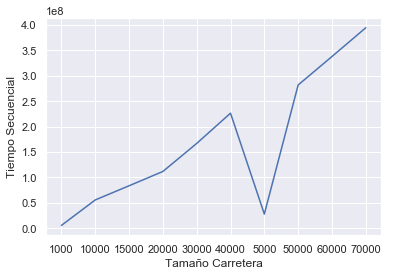

In [93]:
sns.set(style="darkgrid")
sns.lineplot(x="Tamaño Carretera", y="Tiempo Secuencial",
             #style="event",
             data=df1000)

Datos de la ejecución de una carretera de tamaño 10000 para iteraciones entre 1000 y 70000

In [94]:
df_ts10000

,1000,5000,10000,15000,20000,30000,40000,50000,60000,70000
0,55630100.0,268012000.0,538382000.0,806368000.0,1.071220e+09,1.604970e+09,2.177110e+09,2.709320e+09,3.261470e+09,3.786730e+09
1,53420400.0,268501000.0,540410000.0,804326000.0,1.076150e+09,1.600220e+09,2.175480e+09,2.702230e+09,3.245740e+09,3.782140e+09
2,53459400.0,268220000.0,540089000.0,804828000.0,1.071120e+09,1.611310e+09,2.177540e+09,2.702760e+09,3.256660e+09,3.800310e+09
3,53438400.0,269415000.0,539029000.0,802306000.0,1.071940e+09,1.606800e+09,2.172990e+09,2.705490e+09,3.248400e+09,3.790860e+09
4,53458600.0,268501000.0,538705000.0,802414000.0,1.076350e+09,1.604080e+09,2.180220e+09,2.703160e+09,3.344970e+09,3.785230e+09
5,53536900.0,268575000.0,537387000.0,802886000.0,1.074160e+09,1.607180e+09,2.172810e+09,2.705260e+09,3.161380e+09,3.796000e+09
6,53431900.0,268789000.0,542083000.0,802431000.0,1.073150e+09,1.600170e+09,2.173180e+09,2.724580e+09,3.241790e+09,3.902530e+09
7,53493700.0,268412000.0,541685000.0,804364000.0,1.165050e+09,1.604660e+09,2.181020e+09,2.760280e+09,3.248160e+09,3.784380e+09
8,53541200.0,268291000.0,539680000.0,803773000.0,1.071340e+09,1.605680e+09,2.177850e+09,2.705420e+09,3.248380e+09,3.791740e+09
9,53512900.0,268389000.0,538514000.0,802403000.0,1.073100e+09,1.608030e+09,2.177440e+09,2.701120e+09,3.245190e+09,3.801520e+09


In [95]:
columnas10000 = df_ts10000.columns
catidadElementos10000 = len(df_ts10000)

In [96]:
d = {'Tiempo Secuencial': [], 'Tamaño Carretera': []}
for i in columnas10000:
    d["Tiempo Secuencial"].append(df_ts10000[i].mean())
    d["Tamaño Carretera"].append(i)
df10000 = pd.DataFrame(data=d)

Tabla de tiempos promedio en función del tamaño de la carretera para un tamaño de 1000

In [97]:
df10000

,Tiempo Secuencial,Tamaño Carretera
0,5.369235e+07,1000
1,2.685105e+08,5000
2,5.395964e+08,10000
3,8.036099e+08,15000
4,1.082358e+09,20000
5,1.605310e+09,30000
6,2.176564e+09,40000
7,2.711962e+09,50000
8,3.250214e+09,60000
9,3.802144e+09,70000


Gráfica correspondiente a una carretera de tamaño 10000

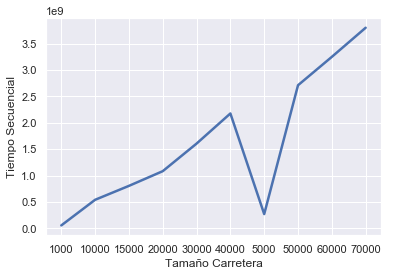

In [98]:
sns.set(style="darkgrid")
sns.lineplot(x="Tamaño Carretera", y="Tiempo Secuencial",
             #style="event",
             data=df10000,
palette="tab10", linewidth=2.5)

Datos de la ejecución de una carretera de tamaño 50000 para iteraciones entre 1000 y 70000

In [99]:
df_ts50000

,1000,5000,10000,15000,20000,30000,40000,50000,60000,70000
0,268594000.0,1.333140e+09,2.686470e+09,3.986900e+09,5.340570e+09,8.010980e+09,1.082150e+10,1.346510e+10,1.611470e+10,1.879440e+10
1,265908000.0,1.338030e+09,2.689140e+09,3.989160e+09,5.319790e+09,7.974820e+09,1.081380e+10,1.346360e+10,1.609390e+10,1.875780e+10
2,266556000.0,1.336380e+09,2.682310e+09,4.018370e+09,5.344420e+09,7.967890e+09,1.077970e+10,1.346040e+10,1.615940e+10,1.887370e+10
3,264654000.0,1.330910e+09,2.682630e+09,4.001650e+09,5.338000e+09,7.970550e+09,1.082190e+10,1.362590e+10,1.612130e+10,1.928650e+10
4,266129000.0,1.337320e+09,2.686740e+09,3.994870e+09,5.333330e+09,7.971560e+09,1.082080e+10,1.343800e+10,1.612850e+10,1.881950e+10
5,266713000.0,1.333850e+09,2.687040e+09,3.989480e+09,5.338690e+09,7.967880e+09,1.082920e+10,1.377870e+10,1.611350e+10,1.884430e+10
6,274569000.0,1.356190e+09,2.687050e+09,4.336870e+09,5.341240e+09,7.982000e+09,1.085160e+10,1.345660e+10,1.611610e+10,1.898930e+10
7,266392000.0,1.335080e+09,2.701820e+09,3.987910e+09,5.329480e+09,8.000090e+09,1.081040e+10,1.354040e+10,1.614900e+10,1.892150e+10
8,260433000.0,1.333090e+09,2.681400e+09,3.992730e+09,5.329850e+09,7.983290e+09,1.092210e+10,1.343460e+10,1.629890e+10,1.909420e+10
9,266724000.0,1.332610e+09,2.680570e+09,3.989720e+09,5.328410e+09,8.066860e+09,1.080770e+10,1.348450e+10,1.625300e+10,1.880790e+10


In [100]:
columnas50000 = df_ts50000.columns
catidadElementos50000 = len(df_ts50000)

In [101]:
d = {'Tiempo Secuencial': [], 'Tamaño Carretera': [],'Tipo':[]}
for i in columnas50000:
    d["Tiempo Secuencial"].append(df_ts50000[i].mean())
    d["Tamaño Carretera"].append(i)
    d["Tipo"].append(50000)
df50000 = pd.DataFrame(data=d)

Tabla de tiempos promedio en función del tamaño de la carretera para un tamaño de 50000

In [102]:
df50000

,Tiempo Secuencial,Tamaño Carretera,Tipo
0,2.666672e+08,1000,50000
1,1.336660e+09,5000,50000
2,2.686517e+09,10000,50000
3,4.028766e+09,15000,50000
4,5.334378e+09,20000,50000
5,7.989592e+09,30000,50000
6,1.082787e+10,40000,50000
7,1.351478e+10,50000,50000
8,1.615483e+10,60000,50000
9,1.891891e+10,70000,50000


Gŕafica correspondiente a la ejecución con un tamaño de carretera de 50000

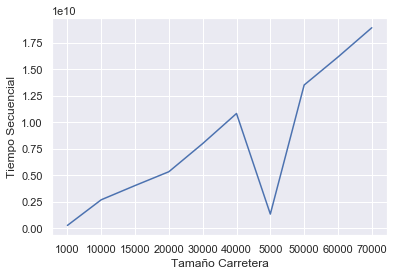

In [103]:
sns.set(style="darkgrid")
sns.lineplot(x="Tamaño Carretera", y="Tiempo Secuencial",
             #style="event",
             data=df50000)

Gráfica que relaciona cada una de las ejecuciones ya mensionadas
siendo la azul: tamaño de 100
siendo la roja: tamaño de 1000
siendo la verde: tamaño de 10000
siendo la naranja: tamaño de 50000

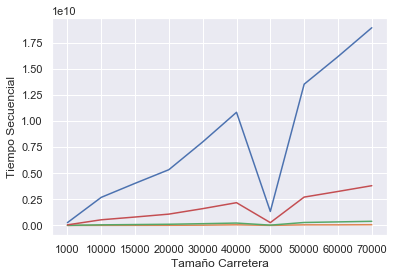

In [104]:
sns.set(style="darkgrid")
sns.lineplot(x="Tamaño Carretera", y="Tiempo Secuencial",
             #style="event",
             data=df50000)

sns.lineplot(x="Tamaño Carretera", y="Tiempo Secuencial",
             #style="event",
             data=df100)

sns.lineplot(x="Tamaño Carretera", y="Tiempo Secuencial",
             #style="event",
             data=df1000)

sns.lineplot(x="Tamaño Carretera", y="Tiempo Secuencial",
             #style="event",
             data=df10000)

# CUDA SOLUCION
Para el algoritmo en CUDA se tuvieron muchos problemas

## se pensaron dos tipos de soluciones: 

el movimiento de los vehículos me asegura una exclusión mutua entre todos, entonces podríamos hacer en todos los casos una granularidad fina, teniendo un hilo corriendo por cada uno de las casillas de la carretera, entonces la idea era mandarle a CUDA, un arreglo con el estado actual de la carretera, un arreglo lleno de 0 que es donde se va guardar el resultado de una iteración dentro de la simulación, cada casilla siendo un hilo aparte va mirarse a si misma  y colocar en el arreglo auxiliar el valor que corresponda a la siguiente iteración después de validar las siguientes condiciones:

- si es 0 no realiza ningún calculo la casilla actual no realiza ningún cambio y termina la ejecución de ese hilo
- si es 1 osea hay vehículo entonces procedo a mirar la siguiente casilla. 
    - si en el siguiente hay un 0, yo voy a modificar en el auxiliar el valor que existe en la siguiente casilla colocando un 1, si es un 1 lo que esta en la siguiente casilla de la iteración actual entonces en la casilla que le corresponde al hilo en el arreglo auxiliar se colocara un 1.


esto garantiza que se cumpla, teniendo en cuenta que cuando este en la ultima posición mi siguiente va ser 0

la segunda solución es ver que para cada cada casilla siempre depende de los valores de ella misma, su anterior y su siguiente, con lógica booleana se puede diseñar una operación que realice el calculo para cada una de las casillas, usando un vector auxiliar como en el anterior.

ninguna de las dos se llevo a cabo

## Que sucedió?

Se hicieron funciones host y global para esto, entonces se genera de manera secuencial el vector se llena de unos y ceros para representar vehículos, se carga en la GPU, se crea un función que acceda por índice para sumarle 1 o cualquier numero a todas las casillas, esta función se llamo de dos maneras, la primera es por bloques, usando bloques como numero de elementos que tenga, se obtenía el id del bloque y con este se indexaba, el resultado después de traer la GPU el arreglo es que solo se suma en la primera posición del arreglo,
luego se dejo un solo bloque y se lanzaron hilos como elementos tuviera la carretera, también pasaba lo mismo.

la verdad no nos explicamos esto, no se pudo solucionar, lo tratamos hasta el ultimo momento

## MEJORAS CACHE LINE

esto es desde el punto de vista del secuencial.

Se piensa que el uso de variables globales es una mejora al cache line ya que estas se guardan en memoria  y no se deben mandar por parámetro de función lo cual genera copias y eso son ejecución en el procesador.